In [1]:
import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from sklearn import linear_model

from pprint import pprint

# Lab 1

## Task 1

In [2]:
X = np.array([ [i] for i in range(1, 10)])

In [3]:
X1 = np.concatenate((np.ones(X.shape), X), axis=1)
pprint(X1)

array([[1., 1.],
       [1., 2.],
       [1., 3.],
       [1., 4.],
       [1., 5.],
       [1., 6.],
       [1., 7.],
       [1., 8.],
       [1., 9.]])


In [4]:
X2 = np.concatenate((np.ones(X.shape), X, 1 / X), axis=1)
pprint(X2)

array([[1.        , 1.        , 1.        ],
       [1.        , 2.        , 0.5       ],
       [1.        , 3.        , 0.33333333],
       [1.        , 4.        , 0.25      ],
       [1.        , 5.        , 0.2       ],
       [1.        , 6.        , 0.16666667],
       [1.        , 7.        , 0.14285714],
       [1.        , 8.        , 0.125     ],
       [1.        , 9.        , 0.11111111]])


In [5]:
X3 = np.concatenate((np.ones(X.shape), X ** 2, X ** 3, np.log(X)), axis=1)
pprint(X3)

array([[1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 4.00000000e+00, 8.00000000e+00, 6.93147181e-01],
       [1.00000000e+00, 9.00000000e+00, 2.70000000e+01, 1.09861229e+00],
       [1.00000000e+00, 1.60000000e+01, 6.40000000e+01, 1.38629436e+00],
       [1.00000000e+00, 2.50000000e+01, 1.25000000e+02, 1.60943791e+00],
       [1.00000000e+00, 3.60000000e+01, 2.16000000e+02, 1.79175947e+00],
       [1.00000000e+00, 4.90000000e+01, 3.43000000e+02, 1.94591015e+00],
       [1.00000000e+00, 6.40000000e+01, 5.12000000e+02, 2.07944154e+00],
       [1.00000000e+00, 8.10000000e+01, 7.29000000e+02, 2.19722458e+00]])


## Task 2

In [6]:
df = pd.read_excel('../data/ls_variants.xls', sheet_name='вар. 15')
df.head()

,x,y
0,0.045826,-31.968642
1,0.046307,-31.649220
2,0.046788,-31.489306
3,0.047269,-31.573924
4,0.047750,-31.187285


In [7]:
x = np.array([df.values[:, 0]]).T
y = np.array([df.values[:, 1]]).T

In [8]:
X = np.concatenate((np.ones(x.shape), x,  x ** 2, x ** 3, 
                    np.exp(x), np.log(x), np.sin(17 * x), 
                    np.cos(17 * x),
                    x ** 4, np.cos(33 * x - 0.3)), axis=1)

In [9]:
n = X.shape[0]
m = X.shape[1]

In [10]:
X[:5, :]

array([[ 1.00000000e+00,  4.58255017e-02,  2.09997661e-03,
         9.62324817e-05,  1.04689171e+00, -3.08291454e+00,
         7.02592014e-01,  7.11592905e-01,  4.40990176e-06,
         3.50921280e-01],
       [ 1.00000000e+00,  4.63065952e-02,  2.14430076e-03,
         9.92952670e-05,  1.04739549e+00, -3.07247088e+00,
         7.08388277e-01,  7.05822959e-01,  4.59802573e-06,
         3.36011237e-01],
       [ 1.00000000e+00,  4.67876886e-02,  2.18908781e-03,
         1.02422359e-04,  1.04789950e+00, -3.06213517e+00,
         7.14137156e-01,  7.00005802e-01,  4.79210542e-06,
         3.21016504e-01],
       [ 1.00000000e+00,  4.72687821e-02,  2.23433776e-03,
         1.05614424e-04,  1.04840376e+00, -3.05190520e+00,
         7.19838268e-01,  6.94141821e-01,  4.99226521e-06,
         3.05940861e-01],
       [ 1.00000000e+00,  4.77498755e-02,  2.28005061e-03,
         1.08872133e-04,  1.04890826e+00, -3.04177882e+00,
         7.25491230e-01,  6.88231411e-01,  5.19863078e-06,
         2.

In [11]:
clf = linear_model.LinearRegression(fit_intercept=False)
clf.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [12]:
y_predicted = clf.predict(X) 
e_all = y_predicted - y
S = np.sum(e_all * e_all)
R = 1 - np.sum(e_all * e_all) / np.sum((y - np.mean(y)) ** 2)

In [13]:
coef = clf.coef_

### Полученная регрессия

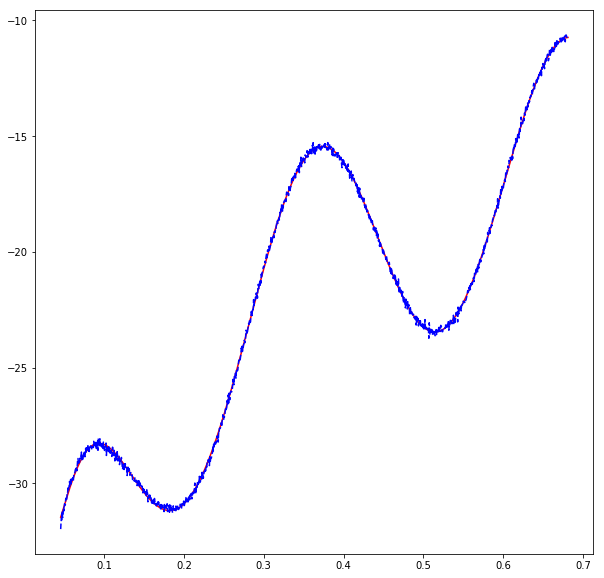

In [14]:
plt.figure(figsize=(10, 10))
plt.plot(x, y_predicted, '-r')
plt.plot(x, y, '--b')
plt.show()

### Остатки ( итог = просто шум)

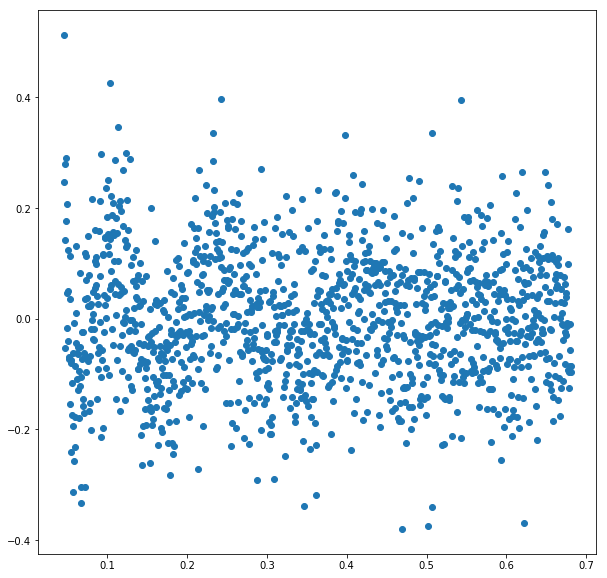

In [15]:
plt.figure(figsize=(10, 10))
plt.plot(x, e_all, 'o')
plt.show()

In [16]:
print(R, S)

0.9996246283579703 18.371034879523094


# Lab 2

## Task 1

### Оценка значимости коэффициентов регрессии по критерию Стюдента

In [17]:
X = np.concatenate((np.ones(x.shape), x,  x ** 2, x ** 3, 
                    np.exp(x), np.log(x), np.sin(17 * x), 
                    np.cos(17 * x),
                    x ** 4, np.cos(33 * x - 0.3)), axis=1)

In [18]:
n = X.shape[0]
m = X.shape[1]

In [19]:
clf = linear_model.LinearRegression(fit_intercept=False)
clf.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [20]:
coef = clf.coef_

### Коэффициенты регрессии

In [21]:
coef.T

array([[-8.56426715e+05],
       [-8.54771980e+05],
       [-4.35879484e+05],
       [-1.23289467e+05],
       [ 8.56250064e+05],
       [-2.81626043e+01],
       [-2.74172793e+00],
       [ 9.86775276e+00],
       [-5.69350741e+04],
       [ 1.46617005e-01]])

In [22]:
y_predicted = clf.predict(X) 
e_all = y_predicted - y
S = np.sum(e_all * e_all)
R = 1 - np.sum(e_all * e_all) / np.sum((y - np.mean(y)) ** 2)
sigma = S / (n - m)

In [23]:
D = sigma * linalg.inv(np.dot(X.T, X))
D = np.diag(D)

In [24]:
from scipy.stats import t
import math
alpha = 0.01
quantile = t.ppf(1 - alpha, n - m)

### Вероятность незначимости коэффициента регрессии

In [25]:
for b, c in zip(coef.flatten(), D):
    t_s = b / np.sqrt(np.abs(c))
    t_s = 2 * (1 - t.cdf(np.abs(t_s), df=n - m))
    print(t_s)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


## Task 2

### Оценка значимости группы факторов по критерию Фишера

In [26]:
X = np.concatenate((np.ones(x.shape), x,  x ** 2, x ** 3, 
                    np.exp(x), np.log(x), np.sin(17 * x), 
                    np.cos(17 * x),
                    x ** 4, np.cos(33 * x - 0.3)), axis=1)
X_P = np.concatenate((np.ones(x.shape), x,  x ** 2, x ** 3, 
                    np.exp(x), np.log(x), np.sin(17 * x), 
                    np.cos(17 * x),
                    x ** 4, np.cos(33 * x - 0.3), 
                    np.tan(20 * x), np.log(10 * x)), axis=1)

In [27]:
n = X.shape[0]
m = X.shape[1]

n_p = X_P.shape[0]
m_p = X_P.shape[1]

In [28]:
clf = linear_model.LinearRegression(fit_intercept=False)
clf.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [29]:
coef = clf.coef_

### Коэффициенты регрессии

In [30]:
clf = linear_model.LinearRegression(fit_intercept=False)
clf.fit(X, y)

clf_p = linear_model.LinearRegression(fit_intercept=False)
clf_p.fit(X_P, y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [31]:
y_predicted = clf.predict(X) 
e_all = y_predicted - y
S = np.sum(e_all * e_all)
R = 1 - np.sum(e_all * e_all) / np.sum((y - np.mean(y)) ** 2)
sigma = S / (n - m)

In [32]:
y_predicted_p = clf_p.predict(X_P) 
e_all_p = y_predicted_p - y
S_p = np.sum(e_all_p * e_all_p)
R_p = 1 - np.sum(e_all_p * e_all_p) / np.sum((y - np.mean(y)) ** 2)
sigma_p = S_p / (n - m)

In [33]:
F = (R - R_p) / (m_p - m) * R_p / (n - m)

In [34]:
from scipy.stats import f
import math
alpha = 0.01

### Вероятность незначимости коэффициента регрессии

In [35]:
F_S = f.ppf(1 - alpha, dfn=m_p-m, dfd=m)

In [36]:
print('Статистика {F_S} < {F}'.format(F=F_S, F_S=F))

Статистика -3.512748303559595e-11 < 7.559432157547899


### Гипотеза о незначимости новых факторов не отвергается, значит построим доверительный интервал

## Task 3

### Совместная доверительная область

In [37]:
X = np.concatenate((np.ones(x.shape), x,  x ** 2, x ** 3, 
                    np.exp(x), np.log(x), np.sin(17 * x), 
                    np.cos(17 * x),
                    x ** 4, np.cos(33 * x - 0.3)), axis=1)

In [38]:
n = X.shape[0]
m = X.shape[1]

In [39]:
clf = linear_model.LinearRegression(fit_intercept=False)
clf.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [40]:
coef = clf.coef_

### Коэффициенты регрессии

In [41]:
coef.T

array([[-8.56426715e+05],
       [-8.54771980e+05],
       [-4.35879484e+05],
       [-1.23289467e+05],
       [ 8.56250064e+05],
       [-2.81626043e+01],
       [-2.74172793e+00],
       [ 9.86775276e+00],
       [-5.69350741e+04],
       [ 1.46617005e-01]])

In [42]:
y_predicted = clf.predict(X) 
e_all = y_predicted - y
S = np.sum(e_all * e_all)
R = 1 - np.sum(e_all * e_all) / np.sum((y - np.mean(y)) ** 2)
sigma = S / (n - m)

In [43]:
D = sigma * linalg.inv(np.dot(X.T, X))
A = D[0:2, 0:2]
p = np.linspace(0, 2 * np.pi, 1000)
k = len(p)
z = np.column_stack((np.cos(p), np.sin(p))).T
alpha = 0.01

In [44]:
quantile_t = np.sqrt(f.ppf(1 - alpha, 2, n - m))

In [45]:
B = linalg.cholesky(A)

In [46]:
coords = np.zeros((k, 2))

In [47]:
for index in range(k):
    result = quantile_t * np.dot(B.T, z[:, index])
    coords[index, :] = result + coef[0, :2]

In [48]:
quantile = t.ppf(1 - alpha, n - m) * np.sqrt(np.diag(A));

In [49]:
betta = np.array([[coef[0, 0] - quantile[0],
                  coef[0, 0] - quantile[0], 
                  coef[0, 0] + quantile[0], 
                  coef[0, 0] + quantile[0], 
                  coef[0, 0] - quantile[0]], 
                 [coef[0, 1] - quantile[1], 
                  coef[0, 1] + quantile[1], 
                  coef[0, 1] + quantile[1], 
                  coef[0, 1] - quantile[1], 
                  coef[0, 1] - quantile[1]]])

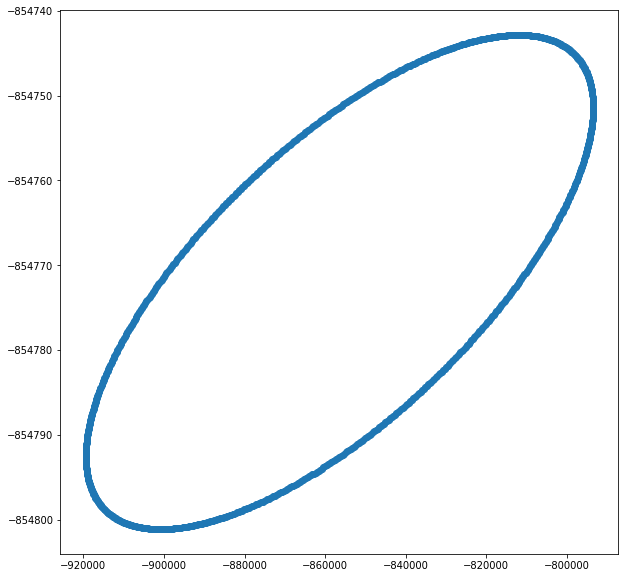

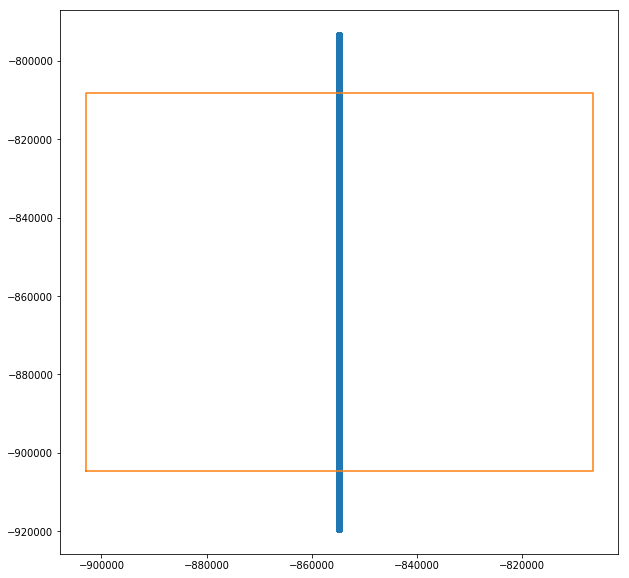

In [50]:
plt.figure(figsize=(10, 10))
plt.plot(coords[:, 0], coords[:, 1], '-o')
# plt.plot(betta[0, :], betta[1, :], '--r')
plt.show()

plt.figure(figsize=(10, 10))
# plt.autoscale()
plt.plot(coords[:, 1], coords[:, 0], '--o')
plt.plot(betta[1, :], betta[0, :])

plt.show()

## Task 4

### Доверительный интервал для прогноза

In [72]:
X_M = np.array([x])[0]
Y_M = np.array([y])[0]

In [85]:
D.shape

(10, 10)

In [86]:
X_M.shape

(1321, 1)

In [87]:
Y_M.shape

(1321, 1)

In [88]:
X.shape

(1321, 10)

In [104]:
X = np.concatenate((np.ones(x.shape), x,  x ** 2, x ** 3, 
                    np.exp(x), np.log(x), np.sin(17 * x), 
                    np.cos(17 * x),
                    x ** 4, np.cos(33 * x - 0.3)), axis=1)

D = linalg.inv(np.dot(X, X.T))

_T = np.dot(np.dot(x.T, D), x)

In [105]:
_T

array([[0.75593442]])